In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
import matplotlib.pyplot as plt


# Importer le DataFrame depuis le fichier CSV
df = pd.read_csv('dataframe.csv')

In [10]:
# Étape 1 : Nettoyage initial
def nettoyage_initial(df):
    # Suppression des colonnes et lignes avec plus de 95% de valeurs manquantes
    seuil = 0.95
    df = df.loc[:, df.isna().mean() < seuil]
    seuil_lignes = 0.90
    df = df.dropna(axis=0, thresh=df.shape[1] * seuil_lignes)
    # Suppression de la colonne 'Patient ID'
    df = df.drop(columns=['Patient ID'])
    # Remplacer 'positive' par 1 et 'negative' par 0 dans la colonne 'SARS-Cov-2 exam result' pour travailler avec des valeurs numériques
    df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].replace({'positive': 1, 'negative': 0})
    return df

In [11]:
# Suppression des doublons 
def supprimer_doublons(df):
    df_sans_doublons = df.drop_duplicates()
    return df_sans_doublons

In [12]:
def supprimer_lignes_nan(df):
    df_sans_nan = df.dropna(how='all')
    return df_sans_nan

In [13]:
def encodage_string(df):
    colonnes_string = df.select_dtypes(include=['object']).columns
    label_encoder = LabelEncoder()
    for col in colonnes_string:
        df[col] = label_encoder.fit_transform(df[col].astype(str))
    return df

In [14]:
def supprimer_valeurs_aberrantes(df, seuil=1.5):
    # Calculer les limites inférieure et supérieure pour chaque colonne
    limites_inferieures = df.quantile(0.25) - seuil * (df.quantile(0.75) - df.quantile(0.25))
    limites_superieures = df.quantile(0.75) + seuil * (df.quantile(0.75) - df.quantile(0.25))
    # Supprimer les lignes contenant des valeurs aberrantes
    masque = ((df < limites_inferieures) | (df > limites_superieures)).any(axis=1)
    df_clean = df[~masque]
    return df_clean


C:\Users\Sabrina\AppData\Local\Temp\ipykernel_21004\2395977406.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].replace({'positive': 1, 'negative': 0})


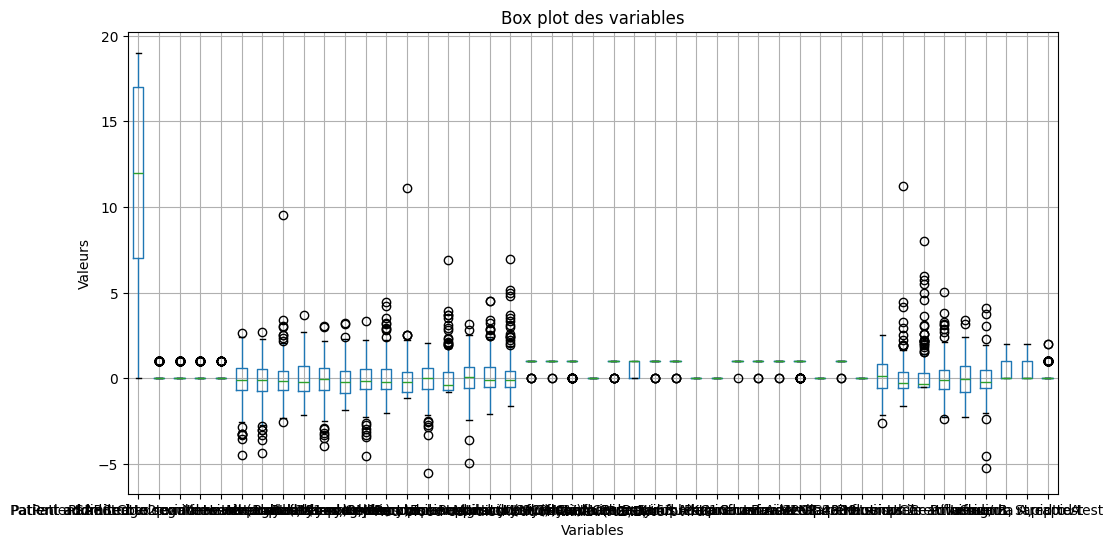

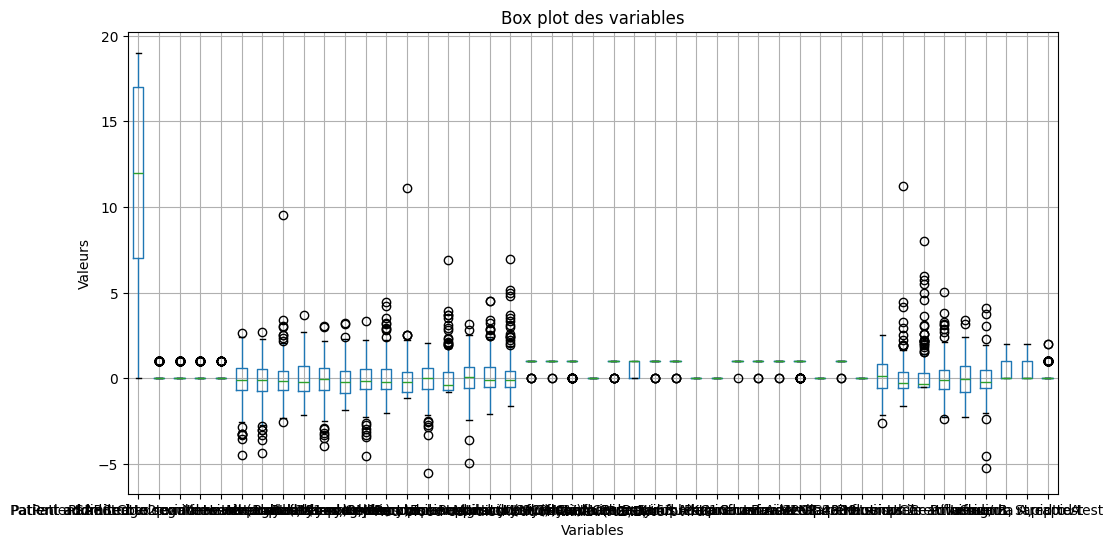

1     0
8     0
15    0
30    0
32    0
Name: SARS-Cov-2 exam result, dtype: int64
 Patient age quantile  SARS-Cov-2 exam result  Patient addmited to regular ward (1=yes, 0=no)  Patient addmited to semi-intensive unit (1=yes, 0=no)  Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  Mean corpuscular volume (MCV)  Monocytes  Red blood cell distribution width (RDW) Respiratory Syncytial Virus  Influenza A  Influenza B Parainfluenza 1 CoronavirusNL63 Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3 Chlamydophila pneumoniae   Adenovirus Parainfluenza 4 Coronavirus229E CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus Parainfluenza 2  Neutrophils      Urea  Proteina C reativa mg/dL  Creatinine  Potassium    Sodium Influenza B, rapid test Influenza A, rapid

In [16]:
from outils import visualiser_valeurs_aberrantes

df = nettoyage_initial(df)
df_sans_doublons = supprimer_doublons(df)
df_sans_nan = supprimer_lignes_nan(df_sans_doublons)
df_encode = encodage_string(df_sans_nan)

visualiser_valeurs_aberrantes(df_encode)
supprimer_valeurs_aberrantes(df_encode, seuil=1.5)
visualiser_valeurs_aberrantes(df_encode)

 # Vérifier les modifications
print(df['SARS-Cov-2 exam result'].head())

# Définir l'affichage pour afficher toutes les colonnes sur une seule ligne
pd.set_option("display.max_columns", None)

# Afficher le DataFrame avec toutes les colonnes sur une seule ligne
print(df.head().to_string(index=False))